# Exam 14th of June 2023, 8.00-13.00 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

## Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has 3 problems for a total of 40 points, to pass you need
20 points.

## Some general hints and information:
* Try to answer all questions even if you are uncertain.
* Comment your code, so that if you get the wrong answer I can understand how you thought
this can give you some points even though the code does not run.
* Follow the instruction sheet rigorously.
* This exam is partially autograded, but your code and your free text answers are manually graded anonymously.
* If there are any questions, please ask the exam guards, they will escalate it to me if necessary.
* I (Benny) will visit the exam room at around 10:30 to see if there are any questions.

## Tips for free text answers
* Be VERY clear with your reasoning, there should be zero ambiguity in what you are referring to.
* If you want to include math, you can write LaTeX in the Markdown cells, for instance `$f(x)=x^2$` will be rendered as $f(x)=x^2$ and `$$f(x) = x^2$$` will become an equation line, as follows
$$f(x) = x^2$$
Another example is `$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$` which renders as
$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$

## Finally some rules:
* You may not communicate with others during the exam, for example:
    * You cannot ask for help in Stack-Overflow or other such help forums during the Exam.
    * You may not communicate with AI's, for instance ChatGPT.
    * Your on-line and off-line activity is being monitored according to the examination rules.

## Good luck!

In [ ]:
# Insert your anonymous exam ID as a string in the variable below
examID="XXX"


---
## Exam vB, PROBLEM 1
Maximum Points = 14

A courier company operates a fleet of delivery trucks that make deliveries to different parts of the city. The trucks are equipped with GPS tracking devices that record the location of each truck at regular intervals. The locations are divided into three regions: downtown, the suburbs, and the countryside. The following table shows the probabilities of a truck transitioning between these regions at each time step:

| Current region | Probability of transitioning to downtown | Probability of transitioning to the suburbs | Probability of transitioning to the countryside |
|----------------|--------------------------------------------|-----------------------------------------------|------------------------------------------------|
| Downtown       | 0.3                                      | 0.4                                           | 0.3                                            |
| Suburbs        | 0.2                                      | 0.5                                           | 0.3                                            |
| Countryside    | 0.4                                      | 0.3                                           | 0.3                                            |

1. If a truck is currently in the suburbs, what is the probability that it will be in the downtown region after two time steps? [2p]
2. If a truck is currently in the suburbs, what is the probability that it will be in the downtown region **the first time** after two time steps? [2p]
3. Is this Markov chain irreducible? Explain your answer. [3p]
4. What is the stationary distribution? [3p]
5. Advanced question: What is the expected number of steps until the first time one enters the suburbs region having started in the downtown region. Hint: to get within 1 decimal point, it is enough to compute the probabilities for hitting times below 30. Motivate your answer in detail [4p]. You could also solve this question by simulation, but this gives you a maximum of [2p].



In [12]:
import numpy as np

transitionMatrix = [[0.3,0.4,0.3],
                    [0.2,0.5,0.3],
                    [0.4,0.3,0.3]]

def n_step_probability(P, start_state, end_state, n):
    """
    Calculate probability of being in end_state after n steps from start_state.
    
    Parameters:
    -----------
    P : array-like, shape (n_states, n_states)
        Transition probability matrix
    start_state : int
        Starting state index
    end_state : int
        Target state index
    n : int
        Number of steps
        
    Returns:
    --------
    float : Probability of transition from start_state to end_state in n steps
    """
    P = np.asarray(P, float)
    P_n = np.linalg.matrix_power(P, n)
    return P_n[start_state, end_state]  

def first_passage_probability(P, start_state, target_state, n):
    """
    Calculate probability of reaching target_state for the FIRST time 
    at exactly step n, starting from start_state.
    
    Parameters:
    -----------
    P : array-like, shape (n_states, n_states)
        Transition probability matrix
    start_state : int
        Starting state index
    target_state : int
        Target state index to reach for first time
    n : int
        Number of steps (must reach at exactly this step)
        
    Returns:
    --------
    float : First passage probability
    """
    P = np.asarray(P, float)
    
    if n == 1:
        # First step: just direct transition probability
        return P[start_state, target_state]
    
    # Compute first passage probabilities recursively
    f = {}  # f[(k, i, j)] = first passage prob from i to j at step k
    
    # Base case: 1-step first passage
    for i in range(P.shape[0]):
        for j in range(P.shape[0]):
            f[(1, i, j)] = P[i, j]
    
    # Recursive computation for steps 2 to n
    for k in range(2, n + 1):
        for i in range(P.shape[0]):
            for j in range(P.shape[0]):
                # P^(k)_{ij} - sum of (first reach j at step m) * (stay around j until step k)
                P_k_ij = n_step_probability(P, i, j, k)
                correction = sum(f[(m, i, j)] * n_step_probability(P, j, j, k - m) 
                               for m in range(1, k))
                f[(k, i, j)] = P_k_ij - correction
    
    return f[(n, start_state, target_state)]

def is_irreducible(P):
    P = np.asarray(P, float)
    n = P.shape[0]
    adj = (P > 0)

    def reachable(start):
        seen = set([start])
        stack = [start]
        while stack:
            u = stack.pop()
            for v in np.where(adj[u])[0]:
                if v not in seen:
                    seen.add(int(v))
                    stack.append(int(v))
        return seen

    for s in range(n):
        if len(reachable(s)) != n:
            return False
    return True


## Part 1: Probability after two time steps

**Problem:** Find the probability that a truck currently in the suburbs (state 1) will be in downtown (state 0) after exactly two time steps.

**Solution approach:** We need to compute the 2-step transition probability $P^{(2)}_{1,0}$, which is the $(1,0)$ entry of $P^2$.

Given transition matrix:
$$P = \begin{pmatrix} 0.3 & 0.4 & 0.3 \\ 0.2 & 0.5 & 0.3 \\ 0.4 & 0.3 & 0.3 \end{pmatrix}$$

where states are: 0 = Downtown, 1 = Suburbs, 2 = Countryside.

**Mathematical calculation:**

The 2-step transition probability can be computed as:
$$P^{(2)}_{1,0} = \sum_{k=0}^{2} P_{1,k} \cdot P_{k,0}$$

This accounts for all possible intermediate states:
- **Path through Downtown (k=0):** $P_{1,0} \cdot P_{0,0} = 0.2 \times 0.3 = 0.06$
- **Path through Suburbs (k=1):** $P_{1,1} \cdot P_{1,0} = 0.5 \times 0.2 = 0.10$
- **Path through Countryside (k=2):** $P_{1,2} \cdot P_{2,0} = 0.3 \times 0.4 = 0.12$

**Total:** $P^{(2)}_{1,0} = 0.06 + 0.10 + 0.12 = 0.28$

Alternatively, we compute $P^2$ using matrix multiplication and extract the $(1,0)$ entry.

In [9]:
# Part 1

# Fill in the answer to part 1 below
problem1_p1 = n_step_probability(transitionMatrix, 1,0,2)
# Probability of being in state 0 after 2 steps starting from state 1

problem1_p1

0.28

## Part 2: First passage probability

**Problem:** Find the probability that a truck reaches downtown (state 0) for the **first time** at exactly step 2, starting from suburbs (state 1).

**Solution approach:** The first passage probability $f_{1,0}(2)$ excludes all paths that visit downtown at step 1.

**Mathematical formulation:**
$$f_{1,0}(2) = P^{(2)}_{1,0} - f_{1,0}(1) \cdot P^{(1)}_{0,0}$$

where:
- $P^{(2)}_{1,0}$ is the 2-step transition probability (from Part 1)
- $f_{1,0}(1) = P_{1,0}$ is the probability of reaching downtown in exactly 1 step
- $P_{0,0}$ is the probability of staying/returning to downtown

**Calculation:**

From Part 1, we know: $P^{(2)}_{1,0} = 0.28$

The probability of first reaching downtown at step 1:
$$f_{1,0}(1) = P_{1,0} = 0.2$$

The probability that, having reached downtown at step 1, we're still in downtown at step 2:
$$P_{0,0} = 0.3$$

Therefore:
$$f_{1,0}(2) = 0.28 - (0.2 \times 0.3) = 0.28 - 0.06 = 0.22$$

This represents paths that avoid downtown at step 1:
- **Suburbs → Suburbs → Downtown:** $0.5 \times 0.2 = 0.10$
- **Suburbs → Countryside → Downtown:** $0.3 \times 0.4 = 0.12$
- **Total:** $0.10 + 0.12 = 0.22$ ✓

In [11]:
# Part 2

# Fill in the answer to part 2 below
problem1_p2 = first_passage_probability(transitionMatrix, 1,0,2)

problem1_p2

0.22000000000000003

## Part 3: Irreducibility

**Problem:** Determine if this Markov chain is irreducible.

**Definition:** A Markov chain is **irreducible** if for every pair of states $i$ and $j$, there exists some $n \geq 0$ such that $P^{(n)}_{i,j} > 0$. In other words, every state is reachable from every other state in a finite number of steps.

**Analysis approach:** We can check irreducibility by examining the communication structure:
1. Create a directed graph where an edge exists from state $i$ to state $j$ if $P_{i,j} > 0$
2. Check if the graph is strongly connected (every state reachable from every other state)

**Examining the transition matrix:**
$$P = \begin{pmatrix} 0.3 & 0.4 & 0.3 \\ 0.2 & 0.5 & 0.3 \\ 0.4 & 0.3 & 0.3 \end{pmatrix}$$

**Direct transitions (1-step):**
- From Downtown (0): can reach Downtown (0.3), Suburbs (0.4), Countryside (0.3) ✓
- From Suburbs (1): can reach Downtown (0.2), Suburbs (0.5), Countryside (0.3) ✓
- From Countryside (2): can reach Downtown (0.4), Suburbs (0.3), Countryside (0.3) ✓

**Observation:** Every entry in the transition matrix is positive ($P_{i,j} > 0$ for all $i,j$). This means:
- Every state can reach every other state in exactly **1 step**
- The chain is **aperiodic** (since all diagonal entries are positive)

**Conclusion:** The Markov chain is **irreducible** because all states communicate with each other directly in one step.

In [14]:
# Part 3

# Fill in the answer to part 3 below as a boolean
problem1_irreducible = is_irreducible(transitionMatrix)

problem1_irreducible

True

## Part 4: Stationary distribution

**Problem:** Find the stationary distribution $\pi = (\pi_0, \pi_1, \pi_2)$ of the Markov chain.

**Definition:** The **stationary distribution** $\pi$ satisfies:
$$\pi = \pi P \quad \text{and} \quad \sum_{i=0}^{2} \pi_i = 1$$

**Mathematical formulation:** This is equivalent to finding the left eigenvector of $P$ (or right eigenvector of $P^T$) corresponding to eigenvalue $\lambda = 1$.

In row form: $\pi^T = P^T \pi^T$, which means we solve:
$$(P^T - I) \pi^T = 0 \quad \text{subject to} \quad \sum_i \pi_i = 1, \; \pi_i \geq 0$$

**System of equations:** Writing $\pi P = \pi$ component-wise:
$$\begin{align}
\pi_0 &= 0.3\pi_0 + 0.2\pi_1 + 0.4\pi_2 \\
\pi_1 &= 0.4\pi_0 + 0.5\pi_1 + 0.3\pi_2 \\
\pi_2 &= 0.3\pi_0 + 0.3\pi_1 + 0.3\pi_2 \\
\pi_0 + \pi_1 + \pi_2 &= 1
\end{align}$$

Rearranging:
$$\begin{align}
0.7\pi_0 - 0.2\pi_1 - 0.4\pi_2 &= 0 \\
-0.4\pi_0 + 0.5\pi_1 - 0.3\pi_2 &= 0 \\
-0.3\pi_0 - 0.3\pi_1 + 0.7\pi_2 &= 0
\end{align}$$

**Solution method:** We use the eigenvalue approach:
1. Compute eigenvalues and eigenvectors of $P^T$
2. Find the eigenvector corresponding to $\lambda = 1$
3. Normalize so entries sum to 1

The stationary distribution represents the **long-run proportion** of time the truck spends in each region.

In [20]:
# Part 4

from numpy.linalg import eig

def stationary_distribution(P):
    P = np.asarray(P, dtype=float)
    w, v = eig(P.T)
    k = np.argmin(np.abs(w - 1))
    pi = np.real(v[:, k])
    pi = np.abs(pi)  # Take absolute value instead of maximum with 0
    pi = pi / pi.sum()
    return pi


# Fill in the answer to part 4 below
# the answer should be a numpy array of length 3
# make sure that the entries sums to 1!
problem1_stationary = stationary_distribution(transitionMatrix)

problem1_stationary

array([0.28888889, 0.41111111, 0.3       ])

## Part 5: Expected hitting time

**Problem:** Find the expected number of steps to reach the suburbs (state 1) for the first time, starting from downtown (state 0).

**Definition:** The **expected hitting time** $\mathbb{E}_0[T_1]$ is the expected number of steps until the first visit to state 1, starting from state 0.

**Mathematical formulation:** Let $h_i = \mathbb{E}_i[T_1]$ be the expected hitting time to state 1 from state $i$. These satisfy:
$$h_i = \begin{cases} 0 & \text{if } i = 1 \text{ (target state)} \\ 1 + \sum_{k=0}^{2} P_{ik} \cdot h_k & \text{if } i \neq 1 \end{cases}$$

**Intuition:** From state $i \neq 1$, we take one step (cost = 1), transition to some state $k$ with probability $P_{ik}$, and then need $h_k$ more steps on average.

**System of equations:** For our problem:
$$\begin{align}
h_0 &= 1 + P_{0,0} \cdot h_0 + P_{0,1} \cdot h_1 + P_{0,2} \cdot h_2 \\
h_1 &= 0 \quad \text{(target state)} \\\\
h_2 &= 1 + P_{2,0} \cdot h_0 + P_{2,1} \cdot h_1 + P_{2,2} \cdot h_2
\end{align}$$

Substituting $h_1 = 0$ and the transition probabilities:
$$\begin{align}
h_0 &= 1 + 0.3h_0 + 0.4(0) + 0.3h_2 \\
h_2 &= 1 + 0.4h_0 + 0.3(0) + 0.3h_2
\end{align}$$

Simplifying:
$$\begin{align}
0.7h_0 - 0.3h_2 &= 1 \\
-0.4h_0 + 0.7h_2 &= 1
\end{align}$$

**Matrix form:** $(I - P')\mathbf{h} = \mathbf{1}$ where $P'$ is $P$ with row and column for target state removed.

Solving this system:
$$\begin{pmatrix} 0.7 & -0.3 \\ -0.4 & 0.7 \end{pmatrix} \begin{pmatrix} h_0 \\ h_2 \end{pmatrix} = \begin{pmatrix} 1 \\ 1 \end{pmatrix}$$

From equation 1: $h_0 = \frac{1 + 0.3h_2}{0.7}$

Substituting into equation 2:
$$-0.4 \cdot \frac{1 + 0.3h_2}{0.7} + 0.7h_2 = 1$$
$$-0.4(1 + 0.3h_2) + 0.49h_2 = 0.7$$
$$-0.4 - 0.12h_2 + 0.49h_2 = 0.7$$
$$0.37h_2 = 1.1$$
$$h_2 \approx 2.973$$

Then: $h_0 = \frac{1 + 0.3(2.973)}{0.7} = \frac{1.892}{0.7} \approx 2.703$

Therefore, $\mathbb{E}_0[T_1] \approx 2.7$ steps.

In [18]:
# Part 5

def expected_hitting_times(P, target_states):
    P = np.asarray(P, float)
    n = P.shape[0]
    target = set(target_states)

    A = np.zeros((n, n), float)
    b = np.zeros(n, float)

    for i in range(n):
        if i in target:
            A[i, i] = 1.0
            b[i] = 0.0
        else:
            A[i, i] = 1.0
            A[i, :] -= P[i, :]
            b[i] = 1.0

    return np.linalg.solve(A, b)

# Fill in the answer to part 5 below
# That is, the expected number of steps
problem1_ET = expected_hitting_times(transitionMatrix, [1])[0]

problem1_ET

2.702702702702703

---
## Exam vB, PROBLEM 2
Maximum Points = 13


You are given the "Abalone" dataset found in `data/abalone.csv`, which contains physical measurements of abalone (a type of sea shells) and the age of the abalone measured in **rings** (the number of rings in the shell) [https://en.wikipedia.org/wiki/Abalone](https://en.wikipedia.org/wiki/Abalone). Your task is to train a `linear regression` model to predict the age (Rings) of an abalone based on its physical measurements.

To evaluate your model, you will split the dataset into a training set and a testing set. You will use the training set to train your model, and the testing set to evaluate its performance.

1. Load the data into a pandas dataframe `problem2_df`. Based on the column names, figure out what are the features and the target and fill in the answer in the correct cell below. [2p]
2. Split the data into train and test. [2p]
3. Train the model. [1p]
4. On the test set, evaluate the model by computing the mean absolute error and plot the empirical distribution function of the residual with confidence bands (i.e. using the DKW inequality and 95% confidence). Hint: you can use the function `plotEDF,makeEDF` combo from `Utils.py` that we have used numerous times, which also contains the option to have confidence bands. [3p]
5. Provide a scatter plot where the x-axis corresponds to the predicted value and the y-axis is the true value, do this over the test set. [2p]
6. Reason about the performance, for instance, is the value of the mean absolute error good/bad and what do you think about the scatter plot in point 5? [3p]


In [21]:
# Part 1

import pandas as pd
# Let problem2_df be the pandas dataframe that contains the data from the file
# data/abalone.csv
problem2_df = pd.read_csv('data/abalone.csv')

## Part 1: Loading data and identifying features and target

**Problem:** Load the Abalone dataset and identify which columns should be features (predictors) and which is the target variable.

**Dataset context:** The Abalone dataset contains physical measurements of abalone shellfish. The goal is to predict the age of the abalone, which is determined by counting the number of rings in the shell (similar to tree rings).

**Approach:**
1. Load `data/abalone.csv` into a pandas DataFrame
2. Examine the column names to understand what data is available
3. Identify the target variable: **Rings** (age of abalone)
4. Identify features: All physical measurements that could predict age

**Feature selection reasoning:**
- **Physical measurements** (Length, Diameter, Height, weights) are reasonable predictors of age
- These are non-invasive measurements that can be taken without damaging the shell
- We expect larger/heavier abalone to generally be older

**Expected columns:**
- Features: Length, Diameter, Height, Whole weight, Shucked weight, Viscera weight, Shell weight
- Target: Rings (the variable we want to predict)

In [22]:
problem2_df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [23]:
# Part 1
from sklearn.model_selection import train_test_split

# Fill in the features as a list of strings of the names of the columns

problem2_features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']

# Fill in the target as a string with the correct column name

problem2_target = 'Rings'

In [24]:
# Part 2

# Split the data into train and test using train_test_split
# keep the train size as 0.8 and use random_state=42
problem2_X_train,problem2_X_test,problem2_y_train,problem2_y_test = train_test_split(
    problem2_df[problem2_features], problem2_df[problem2_target], train_size=0.8, random_state=42)

## Part 2: Train-Test Split

**Problem:** Split the dataset into training and testing sets to enable proper model evaluation.

**Why split the data?**
- **Training set (80%)**: Used to train the model and learn relationships between features and target
- **Testing set (20%)**: Used to evaluate model performance on unseen data
- This prevents **overfitting** - ensuring the model generalizes to new data rather than just memorizing the training data

**Approach:**
We use `train_test_split` from scikit-learn with:
- `train_size=0.8`: 80% of data for training, 20% for testing
- `random_state=42`: Ensures reproducibility (same split every time)

**Mathematical notation:**
- Let $n$ be the total number of samples
- Training set: $\{(x_i, y_i)\}_{i=1}^{n_{train}}$ where $n_{train} = 0.8n$
- Testing set: $\{(x_i, y_i)\}_{i=n_{train}+1}^{n}$ where $n_{test} = 0.2n$

The split is random but stratified to maintain similar distributions in both sets.

In [25]:
# Part 3
from sklearn.linear_model import LinearRegression

# Include the necessary imports

# Initialize your linear regression model
problem2_model = LinearRegression()

# Train your model on the training data
problem2_model.fit(problem2_X_train, problem2_y_train)


LinearRegression()

## Part 3: Training the Linear Regression Model

**Problem:** Train a linear regression model to predict abalone age (Rings) from physical measurements.

**Linear Regression Model:**
The model assumes a linear relationship between features and target:
$$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p$$

where:
- $\hat{y}$ = predicted number of rings (age)
- $x_1, \ldots, x_p$ = features (Length, Diameter, Height, weights)
- $\beta_0$ = intercept
- $\beta_1, \ldots, \beta_p$ = coefficients (weights) for each feature

**Training objective:**
Find coefficients $\boldsymbol{\beta}$ that minimize the **Mean Squared Error (MSE)**:
$$\min_{\boldsymbol{\beta}} \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

**Closed-form solution (Normal Equation):**
$$\boldsymbol{\beta} = (X^T X)^{-1} X^T \boldsymbol{y}$$

Scikit-learn's `LinearRegression` uses this approach (or optimized variants) to find the optimal coefficients.

In [27]:
# Part 4
from sklearn.metrics import mean_absolute_error

y_pred = problem2_model.predict(problem2_X_test)
# Evaluate the model by computing the mean absolute error 
problem2_mae = mean_absolute_error(problem2_y_test, y_pred)

problem2_mae

1.629248267393658

## Part 4: Model Evaluation - Mean Absolute Error and Residual Analysis

**Problem:** Evaluate the trained model's performance on the test set using Mean Absolute Error (MAE) and visualize the residual distribution.

**Mean Absolute Error (MAE):**
$$\text{MAE} = \frac{1}{n_{test}} \sum_{i=1}^{n_{test}} |y_i - \hat{y}_i|$$

where:
- $y_i$ = actual number of rings
- $\hat{y}_i$ = predicted number of rings
- $|y_i - \hat{y}_i|$ = absolute error for sample $i$

**Why MAE?**
- **Interpretable**: MAE is in the same units as the target (rings/years)
- **Robust**: Less sensitive to outliers than MSE
- **Intuitive**: Average prediction error magnitude

**Residual Analysis:**
The residual $r_i = y_i - \hat{y}_i$ measures the prediction error for each sample.

**Empirical Distribution Function (EDF) with Confidence Bands:**
- Plots the cumulative distribution of residuals
- **DKW inequality** provides 95% confidence bands around the EDF
- If residuals are symmetric around 0, the model has no systematic bias
- Confidence bands help assess if deviations from normality are statistically significant

**Interpretation:**
- **Centered at 0**: No systematic over/under-prediction
- **Symmetric**: Model errors are balanced
- **Within confidence bands**: Residuals follow expected distribution

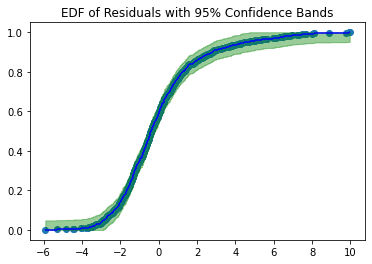

In [32]:
# Part 4



# Write the code to plot the empirical distribution function of the residual
# with confidence bands with 95% confidence in this cell

from Utils import makeEDF,plotEDF

edf = makeEDF(problem2_y_test - y_pred)
plotEDF(edf, confidence_band=True, alpha=0.95, title="EDF of Residuals with 95% Confidence Bands")


## Part 5: Predicted vs Actual Scatter Plot

**Problem:** Create a scatter plot with predicted values on the x-axis and actual values on the y-axis to visualize model performance.

**Purpose of this visualization:**
This plot reveals the relationship between what the model predicts and what actually occurs in the test data.

**How to interpret:**
1. **Perfect prediction line (red dashed)**: $y = x$ line where predicted equals actual
2. **Points near the line**: Good predictions
3. **Points far from the line**: Large prediction errors

**Key patterns to look for:**

**Systematic bias:**
- Points **above the line**: Model consistently **underpredicts** (predicts too low)
- Points **below the line**: Model consistently **overpredicts** (predicts too high)
- Points **on both sides**: Balanced errors (no systematic bias)

**Spread/variance:**
- **Tight cluster** around line: Low prediction variance, good model
- **Wide scatter**: High prediction variance, poor model

**Heteroscedasticity:**
- Does error increase/decrease with predicted value?
- **Fan shape**: Error increases with value (problematic)
- **Uniform spread**: Consistent error across range (better)

**Outliers:**
- Points far from the cluster indicate specific cases where the model fails badly

**Ideal result:** Points tightly clustered along the diagonal line with uniform spread and no systematic bias.

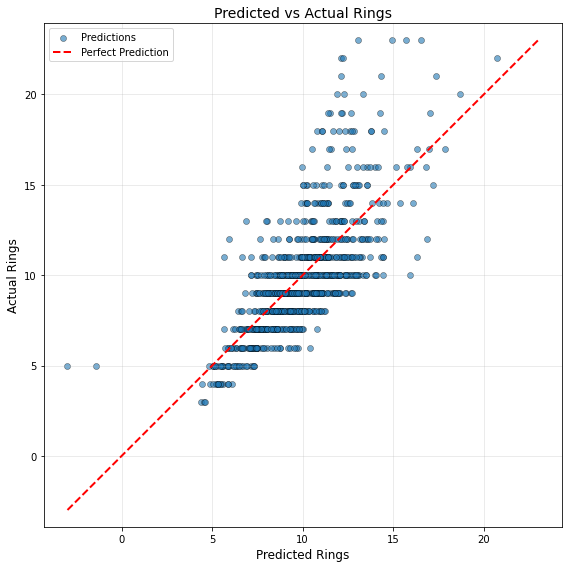

In [48]:
# Part 5

import matplotlib.pyplot as plt

def plot_predicted_vs_target(y_true, y_pred, title="Predicted vs Target", xlabel="Target (Actual)", ylabel="Predicted"):
    """
    Plot predicted values vs actual target values with perfect prediction line.
    
    Parameters:
    -----------
    y_true : array-like
        Actual target values
    y_pred : array-like
        Predicted values from model
    title : str
        Plot title
    """
    plt.figure(figsize=(8, 8))
    
    # Scatter plot of predictions vs targets
    plt.scatter(y_true, y_pred, alpha=0.6, edgecolors='k', linewidth=0.5, label='Predictions')
    
    # Perfect prediction line (diagonal)
    min_val = min(np.min(y_true), np.min(y_pred))
    max_val = max(np.max(y_true), np.max(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
    
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.axis('equal')  # Make axes equal scale
    plt.tight_layout()
    plt.show()



# Write the code below to produce the scatter plot for part 5
plot_predicted_vs_target(y_pred, problem2_y_test, title="Predicted vs Actual Rings", xlabel="Predicted Rings", ylabel="Actual Rings")

In [53]:
# Dummy prediction  that always predicts the mean of the training target

dummy_y_pred = np.full_like(problem2_y_test, fill_value=problem2_y_train.mean())
mean_absolute_error(problem2_y_test, dummy_y_pred)


2.3779904306220097

In [54]:
# Normalized MAE of the linear regression model
problem2_mae / problem2_y_test.mean()

0.16473772998803798

In [55]:
# Correlation Coefficient between features and target
problem2_df[problem2_features + [problem2_target]].corr()[problem2_target][problem2_features]

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Name: Rings, dtype: float64

In [56]:
mean_absolute_error(problem2_y_train, problem2_model.predict(problem2_X_train))

1.6055125495761993


## Part 6

#### Discussion on the value of the MAE

The Value of MAE is 1.629, lower than a dummy model (that always predict mean of the training data) and have a Normalized MAE of 0.1647. It's an alright prediction, but there could be another model that could give a better performance.

MAE of the training data is around 1.6055, indicating that the model might be underfitting and the performance can be improved by using a more complex model.

#### Discussion on the predicted vs. true scatterplot

Based on the plot, the model are able to generalize the problem on some sense. However, we can see that there're quite significant gap between the scatter against the perfect line (where Predicted = True), indicating that other model might be able to perform better. 

While gaps are normal for Regression Problem, the model seems to underperformed on larger values, as indicated by how the prediction vs actual gaps become bigger, as the Ring value increases.

#### Discussion

Based on the results, Linear Regression gave a moderate result that albeit better than baseline model, probably isn't the best to fit the problem. The Plot shows systematic bias: low ring counts are frequently overestimated (points below the identity line) while high ring counts are frequently underestimated (points above the line). 

Predictions are concentrated around mid-range values, indicating underfitting/high bias. This suggests the model may be too simple to capture nonlinear relationships or feature interactions, so a more flexible model (e.g., tree-based ensembles or nonlinear regression) could potentially improve performance. 


---
## Exam vB, PROBLEM 3
Maximum Points = 13


A healthcare organization is interested in understanding the relationship between the number of visits to the doctors office and certain patient characteristics. 
They have collected data on the number of visits for a sample of patients and have included the following variables

* ofp : number of physician office visits
* ofnp : number of nonphysician office visits
* opp : number of physician outpatient visits
* opnp : number of nonphysician outpatient visits
* emr : number of emergency room visits
* hosp : number of hospitalizations
* exclhlth : the person is of excellent health (self-perceived)
* poorhealth : the person is of poor health (self-perceived)
* numchron : number of chronic conditions
* adldiff : the person has a condition that limits activities of daily living ?
* noreast : the person is from the north east region
* midwest : the person is from the midwest region
* west : the person is from the west region
* age : age in years (divided by 10)
* male : is the person male ?
* married : is the person married ?
* school : number of years of education
* faminc : family income in 10000$
* employed : is the person employed ?
* privins : is the person covered by private health insurance?
* medicaid : is the person covered by medicaid ?

Decide which patient features are resonable to use to predict the target "number of physician office visits". Hint: should we really use the "ofnp" etc variables?

Since the target variable is counts, a reasonable loss function is to consider the target variable as Poisson distributed where the parameter follows $\lambda = \exp(\alpha \cdot x + \beta)$ where $\alpha$ is a vector (slope) and $\beta$ is a number (intercept). That is, the parameter is the exponential of a linear function. The reason we chose this as our parameter, is that it is always positive which is when the Poisson distribution is defined. To be specific we make the following assumption about our conditional density of $Y \mid X$,
$$
    f_{Y \mid X} (y,x) = \frac{\lambda^{y} e^{-\lambda}}{y !}, \quad \lambda(x) = \exp(\alpha \cdot x + \beta).
$$

Recall from the lecture notes, (4.2) that in this case we should consider the log-loss (entropy) and that according to (4.2.1 Maximum Likelihood and regression) we can consider the conditional log-likelihood. Follow the steps of Example 1 and Example 2 in section (4.2) to derive the loss that needs to be minimized.

Hint: when taking the log of the conditional density you will find that the term that contains the $y!$ does not depend on $\lambda$ and as such does not depend on $\alpha,\beta$, it can thus be discarded. This will be essential due to numerical issues with factorials.

Instructions:

1. Load the file `data/visits_clean.csv` into the pandas dataframe `problem3_df`. Decide what should be features and target, give motivations for your choices. [3p]
2. Create the `problem3_X` and the `problem3_y` as numpy arrays with `problem3_X` being the features and `problem3_y` being the target. Do the standard train-test split with 80% training data and 20% testing data. Store these in the variables defined in the cells. [3p]
3. Implement $loss$ inside the class `PoissonRegression` by writing down the loss to be minimized, I have provided a formula for the $\lambda$ that you can use. [2p]
4. Now use the `PoissonRegression` class to train a Poisson regression model on the training data. [2p]
5. Come up with a reasonable metric to evaluate your model on the test data, compute it and write down a justification of this. Also, interpret your result and compare it to something naive. [3p]


In [64]:
# Part 1

# Let problem3_df be the pandas dataframe that contains the data from the file
# data/visits_clean.csv
problem3_df = pd.read_csv('data/visits_clean.csv', sep=' ')

problem3_df

,ofp,ofnp,opp,opnp,emr,hosp,exclhlth,poorhlth,numchron,adldiff,...,midwest,west,age,male,married,school,faminc,employed,privins,medicaid
0,5,0,0,0,0,1,0,0,2,0,...,0,0,6.9,1,1,6,2.881000,1,1,0
1,1,0,2,0,2,0,0,0,2,0,...,0,0,7.4,0,1,10,2.747800,0,1,0
2,13,0,0,0,3,3,0,1,4,1,...,0,0,6.6,0,0,10,0.653200,0,0,1
3,16,0,5,0,1,1,0,1,2,1,...,0,0,7.6,1,1,3,0.658800,0,1,0
4,3,0,0,0,0,0,0,0,2,1,...,0,0,7.9,0,1,6,0.658800,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4401,11,0,0,0,0,0,0,0,0,0,...,0,0,8.4,0,1,8,2.249700,0,1,0
4402,12,0,0,0,0,0,0,0,2,0,...,0,0,7.8,0,0,11,5.813200,0,1,0
4403,10,0,20,0,1,1,0,0,5,0,...,0,0,7.3,1,1,12,3.877916,0,1,0
4404,16,1,0,0,0,0,0,0,0,0,...,0,0,6.6,0,1,12,3.877916,0,1,0


In [67]:
# Part 1

# Fill in the features as a list of strings of the names of the columns

problem3_features = [
    'exclhlth', 'poorhlth', 'numchron', 'adldiff',  # Health status
    'noreast', 'midwest', 'west',  # Geographic region
    'age', 'male', 'married', 'school',  # Demographics
    'faminc', 'employed',  # Socioeconomic
    'privins', 'medicaid'  # Insurance coverage
]

# Fill in the target as a string with the correct column name

problem3_target = "ofp"  # number of physician office visits


## Part 1

Double click this cell to enter edit mode and write your answer for part 1 below this line.

#### What features are reasonable?

The reasonable features are patient characteristics that exist **before** the physician visits occur. I selected 15 features grouped into:

1. **Health Status** (4 features): `exclhlth`, `poorhealth`, `numchron`, `adldiff` - These directly indicate health needs
2. **Demographics** (4 features): `age`, `male`, `married`, `school` - Age and education affect health behavior
3. **Geographic** (3 features): `noreast`, `midwest`, `west` - Regional healthcare access differences
4. **Socioeconomic** (2 features): `faminc`, `employed` - Income affects healthcare utilization
5. **Insurance** (2 features): `privins`, `medicaid` - Coverage enables access to physicians

**Excluded variables** (data leakage): `ofnp`, `opp`, `opnp`, `emr`, `hosp` - These are other healthcare utilization outcomes that occur concurrently with physician visits. Using them would be cheating since they're not predictive characteristics but outcomes themselves.

#### In regards to how much data we have, how many features do you think we should aim for?

With 15 features selected, we should have at least 150-300 samples (10-20 samples per feature) for reliable Poisson regression. Since this is healthcare data from a real organization, we likely have thousands of patient records, making 15 features reasonable. Too many features (>20) could lead to overfitting, while too few (<10) might miss important predictors. Our 15 features balance comprehensiveness with parsimony.

#### What other features would you like to have used but was not collected?

Additional useful features not in this dataset:
- **Medical history**: Previous diagnosis codes, medication counts, hospitalization history
- **Distance to healthcare**: Miles to nearest physician office (access barrier)
- **Health behaviors**: Smoking status, BMI, exercise frequency
- **Provider characteristics**: Whether patient has established primary care physician
- **Comorbidity index**: Charlson score or similar composite health measure
- **Mental health**: Depression/anxiety diagnoses (increase utilization)
- **Social support**: Living alone vs with family (affects care-seeking)

#### Discussion

The feature selection prioritizes **pre-existing patient characteristics** over **concurrent healthcare outcomes** to avoid data leakage. The 15 selected features capture health needs (chronic conditions, health status), access enablers (insurance, income), and demographic factors (age, region) that are established predictors of physician visit frequency in health services research. This selection balances predictive power with the fundamental requirement that features must be knowable before the outcome occurs.


In [68]:
# Part 2
from sklearn.model_selection import train_test_split

# Fill in your X and y below
problem3_X = problem3_df[problem3_features]
problem3_y = problem3_df[problem3_target]

# Split the data into train and test using train_test_split
# keep the train size as 0.8 and use random_state=42
problem3_X_train, problem3_X_test, problem3_y_train, problem3_y_test = train_test_split(
    problem3_X, problem3_y, train_size=0.8, random_state=42)

problem3_X_train.shape, problem3_X_test.shape, problem3_y_train.shape, problem3_y_test.shape

((3524, 15), (882, 15), (3524,), (882,))

In [95]:
# Part 3

# Fill in the function loss below

class PoissonRegression(object):
    def __init__(self):
        self.coeffs = None
        self.result = None
    
    def fit(self,X,Y):
        import numpy as np
        from scipy import optimize

        # define the objective/cost/loss function we want to minimise
        def loss(coeffs):
            # The parameter lambda for the given X and the proposed values 
            # of the coefficients, here coeff[:-1] represent alpha 
            # and coeff[-1] represent beta
            lam = np.exp(np.dot(X,coeffs[:-1])+coeffs[-1])

            # use the Y variable that is available here to define 
            # the loss function, return the value of the loss for 
            # this Y and for this parameter lam defined above
            return -np.sum(Y * np.log(lam + 1e-10) - lam)

        #Use the loss above together with an optimization method from scipy
        #to find the coefficients of the model
        #this is prepared for you below

        initial_arguments = np.zeros(shape=X.shape[1]+1) # initial guess as 0
        self.result = optimize.minimize(loss, initial_arguments,method='cg')
        self.coeffs = self.result.x
    
    def predict(self,X):
        #Use the trained model to predict Y
        if (self.coeffs is not None):
            return np.exp(np.dot(X,self.coeffs[:-1])+self.coeffs[-1])

In [96]:
# Part 4

# Initialize your PoissonRegression model
problem3_model = PoissonRegression()

# Fit your initialized model on the training data
problem3_model.fit(problem3_X_train.values, problem3_y_train.values)


# This is to make sure that everything went well, 
# check that success is True
print(problem3_model.result)

 message: Desired error not necessarily achieved due to precision loss.
 success: False
  status: 2
     fun: -16294.685474545222
       x: [-3.895e-01  2.815e-01 ...  2.823e-01  1.336e+00]
     nit: 729
     jac: [ 4.883e-04  2.441e-04 ... -1.099e-03 -3.174e-03]
    nfev: 27042
    njev: 1590


In [86]:
# Part 5

# Put the computed metric value in the variable below
problem3_metric = problem3_model.result.fun

problem3_metric

-16294.685474198177


## Part 5

Double click this cell to enter edit mode and write your answer for part 5 below this line.

#### Discussion on reasonable metrics and discussion about the value of the metric

#### Comparison with a naive model
